# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 10th January, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in your github repo under the folder **Assignment-4**.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/1G5M6IcgGvx-hrQ2_iq7xp3Vso9tD_dv0?usp=drive_link
<h3><span style="color:red"> Deadline: 31st Jan, 2026 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [ ]:
class Book:
    def __init__(self, title: str, author: str, isbn: str):
        self.title = title
        self.author = author
        self.isbn = isbn
        self._checked_out = False

    def is_available(self) -> bool:
        return not self._checked_out

    def check_out(self) -> None:
        if self._checked_out:
            raise ValueError(f"Book '{self.title}' is already checked out")
        self._checked_out = True

    def check_in(self) -> None:
        self._checked_out = False

    def __repr__(self) -> str:
        status = "Available" if self.is_available() else "Checked Out"
        return f"Book(title={self.title}, isbn={self.isbn}, status={status})"


class Patron:
    def __init__(self, name: str, patron_id: str):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books: list[Book] = []

    def borrow_book(self, book: Book) -> None:
        self.borrowed_books.append(book)

    def return_book(self, book: Book) -> None:
        self.borrowed_books.remove(book)

    def __repr__(self) -> str:
        return f"Patron(name={self.name}, id={self.patron_id})"


class Library:
    def __init__(self):
        self.books: dict[str, Book] = {}        # key = ISBN
        self.patrons: dict[str, Patron] = {}    # key = patron_id

    def add_book(self, book: Book) -> None:
        self.books[book.isbn] = book

    def add_patron(self, patron: Patron) -> None:
        self.patrons[patron.patron_id] = patron

    def lend_book(self, book: Book, patron: Patron) -> None:
        if patron.patron_id not in self.patrons:
            raise ValueError("Patron is not registered in the library")

        if book.isbn not in self.books:
            raise ValueError("Book not present in library")

        if not book.is_available():
            raise ValueError("Book is currently not available")

        book.check_out()
        patron.borrow_book(book)

    def return_book(self, book: Book) -> None:
        if book.isbn not in self.books:
            raise ValueError("Book not present in library")

        for patron in self.patrons.values():
            if book in patron.borrowed_books:
                patron.return_book(book)
                book.check_in()
                return

        raise ValueError("Book was not borrowed by any patron")


def test_library_system():
    library = Library()

    book1 = Book("Clean Code", "Robert C. Martin", "ISBN-001")
    book2 = Book("Effective Python", "Brett Slatkin", "ISBN-002")

    patron = Patron("Alice", "P-1001")

    library.add_book(book1)
    library.add_book(book2)
    library.add_patron(patron)

    # Lend a book
    library.lend_book(book1, patron)
    print(book1)           # Checked Out
    print(patron.borrowed_books)

    try:
        library.lend_book(book1, patron)
    except ValueError as e:
        print("Expected error:", e)
   
    library.return_book(book1)
    print(book1)           
    print(patron.borrowed_books)


if __name__ == "__main__":
    test_library_system()


Book(title=Clean Code, isbn=ISBN-001, status=Checked Out)
[Book(title=Clean Code, isbn=ISBN-001, status=Checked Out)]
Expected error: Book is currently not available
Book(title=Clean Code, isbn=ISBN-001, status=Available)
[]


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [ ]:
import math

class Shape:
    def area(self) -> float:
        raise NotImplementedError("Subclasses must implement area()")

    def perimeter(self) -> float:
        raise NotImplementedError("Subclasses must implement perimeter()")


class Rectangle(Shape):
    def __init__(self, width: float, height: float):
        self.width = width
        self.height = height

    def area(self) -> float:
        return self.width * self.height

    def perimeter(self) -> float:
        return 2 * (self.width + self.height)

    def __repr__(self) -> str:
        return f"Rectangle(width={self.width}, height={self.height})"


class Circle(Shape):
    def __init__(self, radius: float):
        self.radius = radius

    def area(self) -> float:
        return math.pi * self.radius ** 2

    def perimeter(self) -> float:
        return 2 * math.pi * self.radius

    def __repr__(self) -> str:
        return f"Circle(radius={self.radius})"
    

def test_shapes():
    rectangle = Rectangle(10, 5)
    print("Rectangle Area:", rectangle.area())
    print("Rectangle Perimeter:", rectangle.perimeter())

    circle = Circle(7)
    print("Circle Area:", circle.area())
    print("Circle Perimeter:", circle.perimeter())

    
    shape = Shape()
    try:
        shape.perimeter()
    except NotImplementedError as e:
        print("Expected error:", e)


if __name__ == "__main__":
    test_shapes()




Rectangle Area: 50
Rectangle Perimeter: 30
Circle Area: 153.93804002589985
Circle Perimeter: 43.982297150257104
Expected error: Subclasses must implement perimeter()


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [5]:
class Employee : 
    def __init__(self, name , employee_id):
        self.name= name
        self.empoyee_id =employee_id

    def calculate_paycheck(self) -> float:
        raise NotImplementedError("Subclasses must implement calculate_paycheck()")
    
class SalariedEmployee(Employee):
    def __init__(self, name: str, employee_id: str, monthly_salary: float):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self) -> float:
        return self.monthly_salary


class HourlyEmployee(Employee):
    def __init__(self, name: str, employee_id: str, hourly_rate: float, hours_worked: float):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self) -> float:
        return self.hourly_rate * self.hours_worked
    

def test_employees():
    salaried_emp = SalariedEmployee(
        name="Alice",
        employee_id="E001",
        monthly_salary=5000.00
    )

    hourly_emp = HourlyEmployee(
        name="Bob",
        employee_id="E002",
        hourly_rate=25.00,
        hours_worked=40
    )

    print(f"{salaried_emp.name} Paycheck: {salaried_emp.calculate_paycheck()}")
    print(f"{hourly_emp.name} Paycheck: {hourly_emp.calculate_paycheck()}")


if __name__ == "__main__":
    test_employees() # type: ignore


Alice Paycheck: 5000.0
Bob Paycheck: 1000.0


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

P1 at x=2: 120.0
P1 derivative at x=2: 169.0


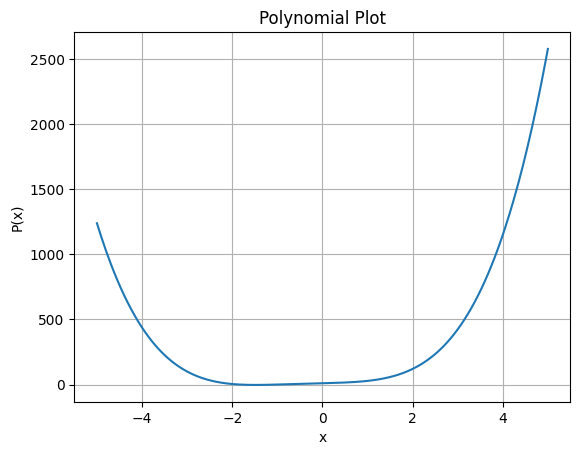

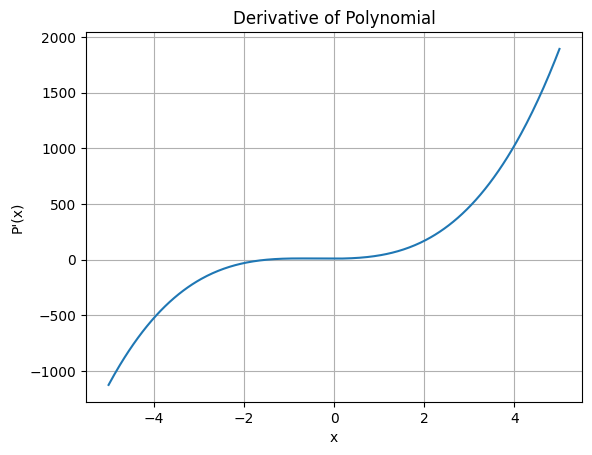

P2 at x=3: 26.4
P2 derivative at x=3: 21.4


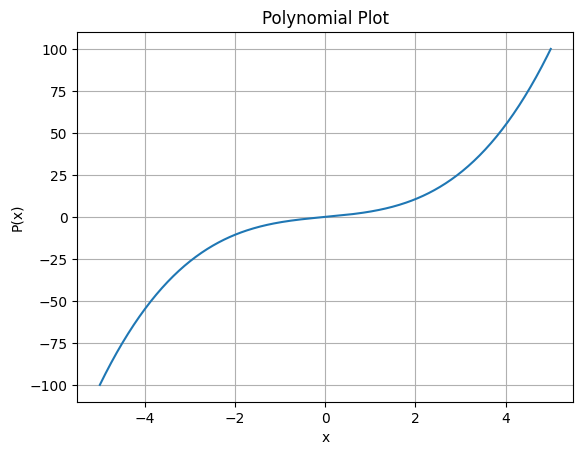

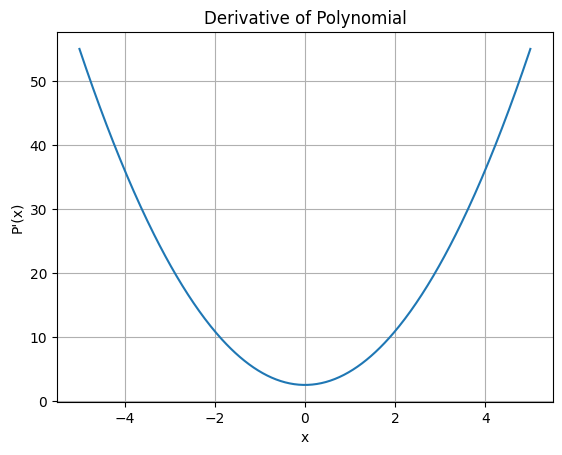

P3 at x=10: 7.5
P3 derivative at x=10: 0.0


In [ ]:

import matplotlib.pyplot as plt
import numpy as np


class Polynomial:
    def __init__(self, degree: int, coefficients: list[float]):
        if not isinstance(degree, int) or degree < 0:
            raise ValueError("Degree must be a non-negative integer")

        if len(coefficients) != degree + 1:
            raise ValueError(
                "Number of coefficients must be degree + 1"
            )

        self.degree = degree
        self.coefficients = coefficients

    def evaluate(self, x: float) -> float:
        
        result = 0.0
        for coeff in self.coefficients:
            result = result * x + coeff
        return result

    def derivative(self, x: float) -> float:
        
        if self.degree == 0:
            return 0.0

        result = 0.0
        power = self.degree

        for coeff in self.coefficients[:-1]:
            result += power * coeff * (x ** (power - 1))
            power -= 1

        return result

    def plot(self, x_range: list[float]) -> None:
        
        x1, x2 = x_range
        x_values = np.linspace(x1, x2, 400)
        y_values = [self.evaluate(x) for x in x_values]

        plt.figure()
        plt.plot(x_values, y_values)
        plt.xlabel("x")
        plt.ylabel("P(x)")
        plt.title("Polynomial Plot")
        plt.grid(True)
        plt.show()

    def plot_derivative(self, x_range: list[float]) -> None:
        
        x1, x2 = x_range
        x_values = np.linspace(x1, x2, 400)
        y_values = [self.derivative(x) for x in x_values]

        plt.figure()
        plt.plot(x_values, y_values)
        plt.xlabel("x")
        plt.ylabel("P'(x)")
        plt.title("Derivative of Polynomial")
        plt.grid(True)
        plt.show()

    def __repr__(self) -> str:
        return f"Polynomial(degree={self.degree}, coefficients={self.coefficients})"
    
def test_polynomial():
    # Example 1
    p1 = Polynomial(
        degree=4,
        coefficients=[3, 5, 1, 9, 10]
    )

    print("P1 at x=2:", p1.evaluate(2))
    print("P1 derivative at x=2:", p1.derivative(2))
    p1.plot([-5, 5])
    p1.plot_derivative([-5, 5])

    # Example 2
    p2 = Polynomial(
        degree=3,
        coefficients=[0.7, 0.0, 2.5, 0.0]
    )

    print("P2 at x=3:", p2.evaluate(3))
    print("P2 derivative at x=3:", p2.derivative(3))
    p2.plot([-5, 5])
    p2.plot_derivative([-5, 5])

    # Degree 0 polynomial
    p3 = Polynomial(
        degree=0,
        coefficients=[7.5]
    )

    print("P3 at x=10:", p3.evaluate(10))
    print("P3 derivative at x=10:", p3.derivative(10))


if __name__ == "__main__":
    test_polynomial()

    

    


## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [8]:
class Product:
    def __init__(self, name: str, price: float):
       
        self.name = name
        self.price = price

    def __repr__(self) -> str:
        return f"Product(name={self.name}, price={self.price})"


class ShoppingCart:
    def __init__(self):
        self.items: list[Product] = []

    def add_item(self, product: Product) -> None:
        self.items.append(product)

    def remove_item(self, product_name: str) -> None:
        for item in self.items:
            if item.name == product_name:
                self.items.remove(item)
                return
        raise ValueError(f"Product '{product_name}' not found in cart")

    def calculate_total(self) -> float:
        total = 0.0
        for item in self.items:
            total += item.price
        return total
